<a href="https://colab.research.google.com/github/Sukshi-Gupta/GFGKIIT-spikers-Hyperthon/blob/main/Copy_of_heartdisease_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Install the ucimlrepo package (run this in your environment if not installed)
# !pip install ucimlrepo

from ucimlrepo import fetch_ucirepo

# Fetch the dataset
heart_disease = fetch_ucirepo(id=45)

# Data as pandas DataFrame
X = heart_disease.data.features  # Features
y = heart_disease.data.targets   # Target (Presence of heart disease)

# Display basic information
print("Features:\n", X.head())
print("\nTarget:\n", y.head())


Features:
    age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  
0  0.0   6.0  
1  3.0   3.0  
2  2.0   7.0  
3  0.0   3.0  
4  0.0   3.0  

Target:
    num
0    0
1    2
2    1
3    0
4    0


In [ ]:
# Define disease mapping
disease_mapping = {
    0: {"disease": "No Heart Disease", "cause": "N/A", "cure": "Maintain a healthy lifestyle."},
    1: {"disease": "Presence of Heart Disease", "cause": "Plaque buildup, high cholesterol.", "cure": "Medications, surgery, and lifestyle changes."}
}

# Convert y (Series) to a DataFrame with a proper column name
y_df = pd.DataFrame(y, columns=["target"])  # Ensure 'target' is explicitly named

# Combine features (X) and the target column into one DataFrame
X_combined = pd.concat([X, y_df], axis=1)  # Concatenate along columns

# Add disease details based on target values
X_combined['disease'] = X_combined['target'].map({k: v["disease"] for k, v in disease_mapping.items()})
X_combined['cause'] = X_combined['target'].map({k: v["cause"] for k, v in disease_mapping.items()})
X_combined['cure'] = X_combined['target'].map({k: v["cure"] for k, v in disease_mapping.items()})

# Preview the combined DataFrame
print(X_combined.head())


   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  target disease cause cure  
0  0.0   6.0     NaN     NaN   NaN  NaN  
1  3.0   3.0     NaN     NaN   NaN  NaN  
2  2.0   7.0     NaN     NaN   NaN  NaN  
3  0.0   3.0     NaN     NaN   NaN  NaN  
4  0.0   3.0     NaN     NaN   NaN  NaN  


In [ ]:
# Drop non-feature columns (disease, cause, cure) and keep target separately
features = X_combined.drop(columns=['disease', 'cause', 'cure', 'target'])  # Feature set
target = X_combined['target']  # Target column

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Verify shapes
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


Training set shape: (242, 13)
Testing set shape: (61, 13)


In [ ]:
# Check for missing values in features (X) and target (y)
print("Missing values in features (X):")
print(X.isnull().sum())

print("\nMissing values in target (y):")
print(y.isnull().sum())



Missing values in features (X):
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
dtype: int64

Missing values in target (y):
num    0
dtype: int64


In [ ]:
# Combine X and y into a single DataFrame for consistent row removal
combined = pd.concat([X, y], axis=1)

# Drop rows where any column (features or target) has missing values
combined = combined.dropna()

# Split back into X and y after cleaning
X = combined.iloc[:, :-1]  # All columns except the last one (features)
y = combined.iloc[:, -1]   # Last column (target)

# Verify shapes after cleaning
print("\nAfter removing missing values:")
print("Features (X) shape:", X.shape)
print("Target (y) shape:", y.shape)



After removing missing values:
Features (X) shape: (297, 13)
Target (y) shape: (297,)


In [ ]:
from sklearn.model_selection import train_test_split

# Split the cleaned data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verify shapes
print("\nTraining set shape (X_train):", X_train.shape)
print("Testing set shape (X_test):", X_test.shape)



Training set shape (X_train): (237, 13)
Testing set shape (X_test): (60, 13)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on test set
y_pred = model.predict(X_test)

# Evaluate the model
print("\nAccuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy: 0.6

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.97      0.88        36
           1       0.00      0.00      0.00         9
           2       0.14      0.20      0.17         5
           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00         3

    accuracy                           0.60        60
   macro avg       0.19      0.23      0.21        60
weighted avg       0.49      0.60      0.54        60



In [ ]:
# Select a sample from the test set
sample = X_test.iloc[0:1]  # Use a DataFrame (not a Series) to retain feature names

# Predict on the sample
sample_prediction = model.predict(sample)[0]
print(f"Prediction: {sample_prediction}")


Prediction: 0


In [ ]:
def get_disease_info(prediction):
    """Return disease name, cause, and cure for a given prediction."""
    info = disease_mapping[prediction]
    return f"""
    Disease Name: {info['disease']}
    Cause: {info['cause']}
    Cure/Treatment: {info['cure']}
    """

# Get insights for the sample prediction
print(get_disease_info(sample_prediction))



    Disease Name: No Heart Disease
    Cause: N/A
    Cure/Treatment: Maintain a healthy lifestyle.
    


In [ ]:
# Example custom input
custom_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]

# Convert to DataFrame with the same feature names as training data
custom_input_df = pd.DataFrame(custom_input, columns=features.columns)

# Predict using the model
custom_prediction = model.predict(custom_input_df)[0]
print(f"Prediction: {custom_prediction}")


Prediction: 0


In [ ]:
columns = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
           'exang', 'oldpeak', 'slope', 'ca', 'thal']
custom_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
custom_input_df = pd.DataFrame(custom_input, columns=columns)


In [ ]:
sample = X_test.iloc[0:1]
sample_prediction = model.predict(sample)[0]
print(sample_prediction)


0


In [ ]:
custom_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]
custom_input_df = pd.DataFrame(custom_input, columns=features.columns)
custom_prediction = model.predict(custom_input_df)[0]
print(custom_prediction)


0


In [ ]:
# Select a sample row from the test set
sample = X_test.iloc[0:1]  # Keep it as a DataFrame to retain feature names

# Predict using the trained model
sample_prediction = model.predict(sample)[0]  # Get the prediction as a scalar

print(f"Sample Prediction: {sample_prediction}")


Sample Prediction: 0


In [ ]:
# Predict on a sample from test data
sample = X_test.iloc[0:1]
sample_prediction = model.predict(sample)[0]
print(f"Sample Prediction: {sample_prediction}")
print(get_disease_info(sample_prediction))

# Predict on custom input
custom_input = [[63, 1, 3, 145, 233, 1, 0, 150, 0, 2.3, 0, 0, 1]]  # Example
custom_input_df = pd.DataFrame(custom_input, columns=features.columns)
custom_prediction = model.predict(custom_input_df)[0]
print(f"Custom Input Prediction: {custom_prediction}")
print(get_disease_info(custom_prediction))


Sample Prediction: 0

    Disease Name: No Heart Disease
    Cause: N/A
    Cure/Treatment: Maintain a healthy lifestyle.
    
Custom Input Prediction: 0

    Disease Name: No Heart Disease
    Cause: N/A
    Cure/Treatment: Maintain a healthy lifestyle.
    


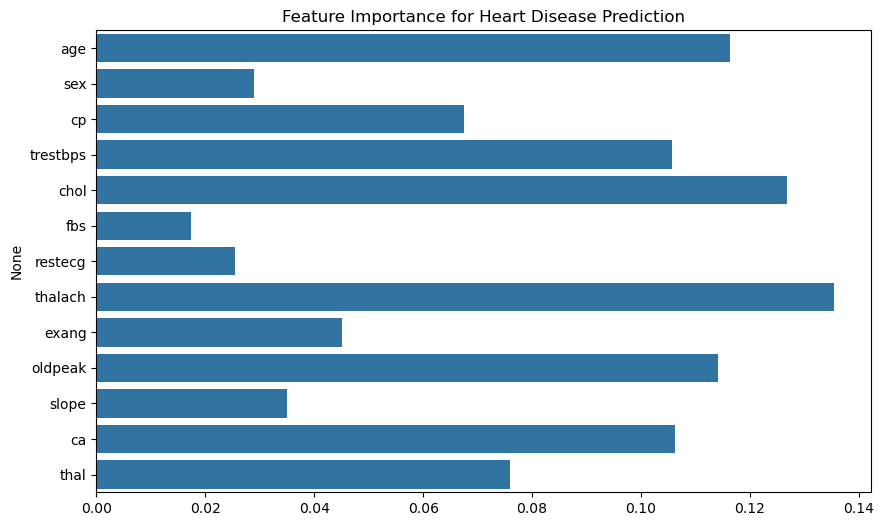

In [ ]:
# Feature importance
importances = model.feature_importances_
feature_names = features.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance for Heart Disease Prediction")
plt.show()


In [ ]:
import joblib

# Save the model
joblib.dump(model, "heart_disease_model.pkl")
print("Model saved successfully.")

# Load the model
loaded_model = joblib.load("heart_disease_model.pkl")
print("Model loaded successfully.")

# Test the loaded model
# Select a sample row for prediction
sample = X_test.iloc[0:1]  # Keep it as a DataFrame to retain feature names

# Predict using the loaded model
sample_prediction = loaded_model.predict(sample)[0]  # Do not wrap in another list

# Print the disease information
print(get_disease_info(sample_prediction))


Model saved successfully.
Model loaded successfully.

    Disease Name: No Heart Disease
    Cause: N/A
    Cure/Treatment: Maintain a healthy lifestyle.
    
